In [1]:
# ÂÆâË£ÖÂ∫ì
!pip install scikit-learn -q

# ÂØºÂÖ•ÊâÄÈúÄÂåÖ
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# ‰∏ä‰º†Âπ∂ËØªÂèñÊñá‰ª∂
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# ÊòæÁ§∫ÂâçÂá†Ë°åÁ°ÆËÆ§
df.head()


Saving amazon_reviews_final_cleaned_v2.csv to amazon_reviews_final_cleaned_v2.csv


brand                                               text  created_at  \
0  Apple  No charger. Every thing is good about iPhones,...  2024-11-08   
1  Apple  iPhone 13 256GB. It look so fabulous, I am and...  2024-08-16   
2  Apple  Flip camera option nill. I tried to flip camer...  2024-05-14   
3  Apple  Good product. Happy to get the iPhone 13 in Am...  2024-05-18   
4  Apple  Too smooth and effective battery life. 5 star ...  2024-05-14   

      label  rating lang                                       cleaned_text  
0  positive       4   en  charger every thing good iphones theres nothin...  
1  positive       5   en  iphone gb look fabulous android user switched ...  
2  positive       4   en  flip camera option nill tried flip camera reco...  
3  positive       5   en         good product happy get iphone amazon offer  
4  positive       5   en                 smooth effective battery life star

TF-IDF

In [2]:
# Á¨¨‰∫åÊ≠•ÔºöÊåâÂìÅÁâåÊèêÂèñ TF-IDF ÂÖ≥ÈîÆËØç
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Ëá™ÂÆö‰πâÂáΩÊï∞ÔºöÊèêÂèñÊØè‰∏™ÂìÅÁâåÂâç N ‰∏™ÂÖ≥ÈîÆËØç
def extract_top_tfidf_words(texts, top_n=20):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)
    tfidf_scores = X.sum(axis=0).A1  # ÊØè‰∏™ËØçÁöÑÊÄªÊùÉÈáç
    words = vectorizer.get_feature_names_out()
    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    top_words = [(words[i], tfidf_scores[i]) for i in top_indices]
    return top_words

# Ëé∑ÂèñÊâÄÊúâÂìÅÁâå
brands = df["brand"].unique()

# ÊåâÂìÅÁâåÊèêÂèñÂÖ≥ÈîÆËØç
brand_keywords = {}

for brand in brands:
    texts = df[df["brand"] == brand]["cleaned_text"].dropna().astype(str).tolist()
    top_words = extract_top_tfidf_words(texts, top_n=20)
    brand_keywords[brand] = top_words

# Â±ïÁ§∫ÊØè‰∏™ÂìÅÁâåÁöÑÂÖ≥ÈîÆËØç
for brand, keywords in brand_keywords.items():
    print(f"\n {brand} Palabras clave de alta frecuencia (TF-IDF Top 20)Ôºö")
    for word, score in keywords:
        print(f"{word}: {score:.4f}")



 Apple Palabras clave de alta frecuencia (TF-IDF Top 20)Ôºö
phone: 141.9388
good: 141.1892
iphone: 106.7945
quality: 83.5836
product: 81.4995
battery: 80.4714
camera: 75.3286
great: 60.4462
buy: 56.8103
best: 53.7251
apple: 52.4758
amazon: 46.6947
like: 46.5674
new: 45.4050
nice: 44.6476
price: 39.7578
excellent: 37.5495
life: 34.1888
android: 34.0960
condition: 32.8930

 samsung Palabras clave de alta frecuencia (TF-IDF Top 20)Ôºö
phone: 2445.7953
stars: 2174.1181
great: 1359.4982
good: 1045.4964
love: 762.5207
new: 660.3457
price: 633.9423
works: 600.6949
like: 586.5435
buy: 585.2482
battery: 552.7445
screen: 538.1376
samsung: 533.6601
use: 453.1438
product: 428.9385
star: 416.0472
work: 408.5703
excellent: 375.7697
quality: 375.6964
note: 373.2188

 Xiaomi Palabras clave de alta frecuencia (TF-IDF Top 20)Ôºö
good: 235.4332
phone: 222.7595
camera: 178.7520
quality: 164.4738
price: 137.7610
battery: 127.0286
mobile: 109.4769
best: 102.5965
product: 99.3927
buy: 84.0409
redmi: 79.5678


 Tiempo total dedicado a la extracci√≥n de palabras clave TF-IDFÔºö1.52 segundo


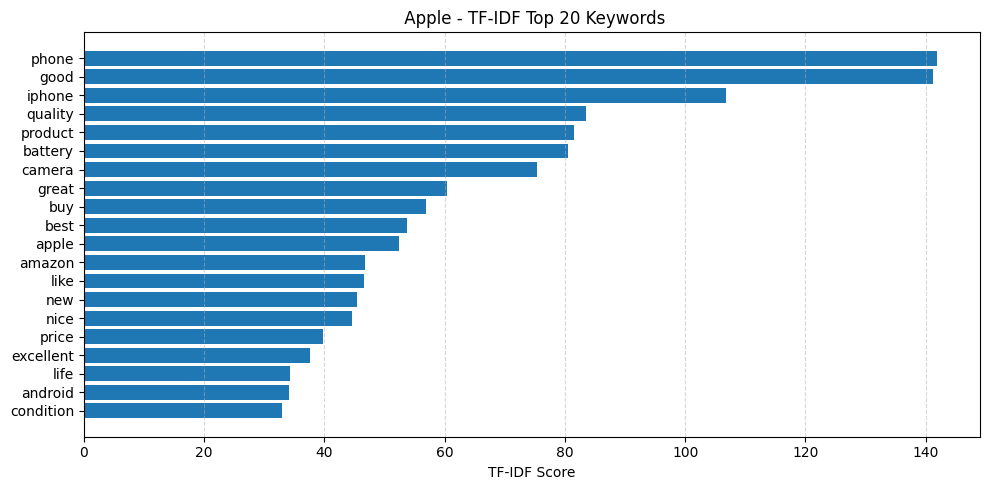

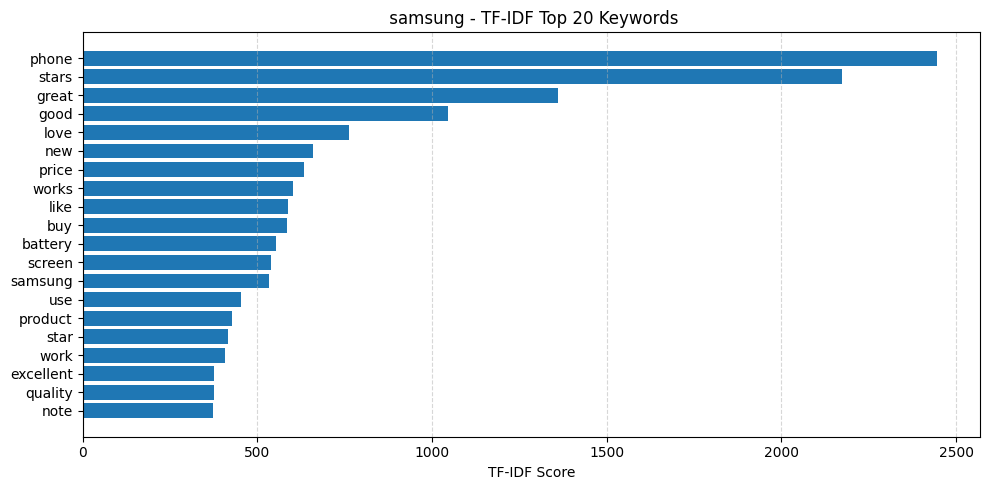

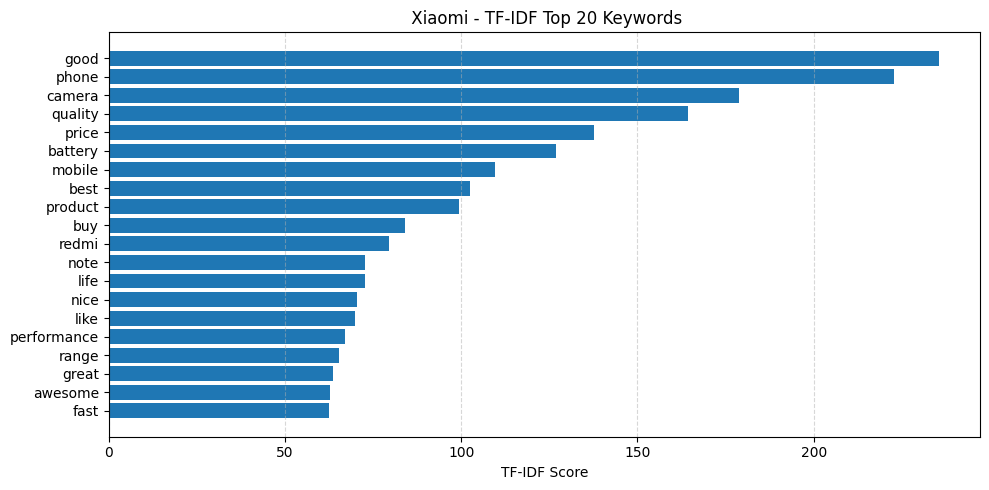

In [3]:
# ÂÆâË£ÖÊâÄÈúÄÂ∫ìÔºàÂ¶ÇÊûúÊú™ÂÆâË£ÖÔºâ
!pip install matplotlib -q

# ÂØºÂÖ•Â∑•ÂÖ∑
import time
import matplotlib.pyplot as plt

#  ËÆ∞ÂΩïÂºÄÂßãÊó∂Èó¥
start_time = time.time()

# Á¨¨‰∏ÄÊ≠•ÔºöÊåâÂìÅÁâåÊèêÂèñÂÖ≥ÈîÆËØçÔºà‰Ω†Â∑≤Êúâ‰ª£Á†ÅÔºâ
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

def extract_top_tfidf_words(texts, top_n=20):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)
    tfidf_scores = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    top_words = [(words[i], tfidf_scores[i]) for i in top_indices]
    return top_words

brands = df['brand'].unique()
brand_keywords = {}

for brand in brands:
    texts = df[df['brand'] == brand]['cleaned_text'].dropna().astype(str).tolist()
    top_words = extract_top_tfidf_words(texts, top_n=20)
    brand_keywords[brand] = top_words

#  ËÆ∞ÂΩïÁªìÊùüÊó∂Èó¥
end_time = time.time()
print(f"\n Tiempo total dedicado a la extracci√≥n de palabras clave TF-IDFÔºö{end_time - start_time:.2f} segundo")

#  ÂèØËßÜÂåñÔºöÁªòÂà∂ÊØè‰∏™ÂìÅÁâåÂâç20ËØçÊù°ÁöÑÊù°ÂΩ¢Âõæ
for brand, keywords in brand_keywords.items():
    words, scores = zip(*keywords)
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], scores[::-1])
    plt.title(f" {brand} - TF-IDF Top 20 Keywords")
    plt.xlabel("TF-IDF Score")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


 BERTopic

In [4]:
# ÂÆâË£Ö BERTopicÔºàÂ¶ÇÊûúÊú™ÂÆâË£ÖÔºâ
!pip install bertopic -q
!pip install umap-learn -q
!pip install hdbscan -q

# ÂØºÂÖ•ÊâÄÈúÄÂ∫ì
from bertopic import BERTopic
import pandas as pd

# ÂáÜÂ§áÂª∫Ê®°ÊñáÊú¨ÔºàÁ°Æ‰øùÊØè‰∏™ brand ÂçïÁã¨Âª∫Ê®°Ôºâ
df_twitter = df[df['brand'].isin(['Apple', 'samsung', 'Xiaomi'])]  # ÂèØÈÄâÔºåÂè™Âèñ‰∏âÂìÅÁâå


In [5]:
from bertopic import BERTopic

# Â≠òÂÇ®ÊØè‰∏™ÂìÅÁâåÁöÑÊ®°ÂûãÂíåÁªìÊûú
brand_models = {}
brand_topics_info = {}

# Ëé∑ÂèñÂìÅÁâåÂàóË°®
brands = df_twitter['brand'].unique()

for brand in brands:
    print(f"\nüîç Ê≠£Âú®Âª∫Ê®°ÂìÅÁâåÔºö{brand}")

    # Ëé∑ÂèñÂπ∂Ê∏ÖÊ¥óÊñáÊú¨ÔºàÂéªÈô§Á©∫ÂÄº„ÄÅÂº∫Âà∂‰∏∫Â≠óÁ¨¶‰∏≤Ôºâ
    texts = df_twitter[df_twitter['brand'] == brand]['cleaned_text']
    texts = texts.dropna().astype(str).tolist()

    print(f"üìÑ ÊñáÊú¨Êï∞ÈáèÔºö{len(texts)}")

    # ÂàõÂª∫Âπ∂ËÆ≠ÁªÉ BERTopic Ê®°Âûã
    topic_model = BERTopic(language="english", top_n_words=10, calculate_probabilities=False, verbose=False)
    topics, _ = topic_model.fit_transform(texts)

    # Â≠òÂÇ®Ê®°ÂûãÂíå‰∏ªÈ¢ò‰ø°ÊÅØ
    brand_models[brand] = topic_model
    brand_topics_info[brand] = topic_model.get_topic_info()

    # ÊòæÁ§∫Ââç 5 ‰∏™‰∏ªÈ¢òÊ¶ÇËßà
    print(f"\nüìå {brand} ÁöÑÂâç 5 ‰∏™‰∏ªÈ¢òÔºö")
    display(topic_model.get_topic_info().head(5))



üîç Ê≠£Âú®Âª∫Ê®°ÂìÅÁâåÔºöApple
üìÑ ÊñáÊú¨Êï∞ÈáèÔºö1899

üìå Apple ÁöÑÂâç 5 ‰∏™‰∏ªÈ¢òÔºö


Topic  Count                                  Name  \
0     -1    621              -1_phone_good_aaa_iphone   
1      0    181    0_scratches_condition_battery_came   
2      1     73             1_phone_great_happy_works   
3      2     68      2_locked_stolen_verizon_unlocked   
4      3     65  3_heating_issue_overheating_charging   

                                      Representation  \
0  [phone, good, aaa, iphone, quality, battery, c...   
1  [scratches, condition, battery, came, refurbis...   
2  [phone, great, happy, works, best, nice, gift,...   
3  [locked, stolen, verizon, unlocked, att, activ...   
4  [heating, issue, overheating, charging, heated...   

                                 Representative_Docs  
0  [st purchase great one iphone daysit worst bat...  
1  [quality purchase scratches like new, great pu...  
2  [sonas gift though big techy happy use easily ...  
3  [unlocked tried activate refurbished unlocked ...  
4  [battery heating problem charging much battery...


üîç Ê≠£Âú®Âª∫Ê®°ÂìÅÁâåÔºösamsung
üìÑ ÊñáÊú¨Êï∞ÈáèÔºö21724

üìå samsung ÁöÑÂâç 5 ‰∏™‰∏ªÈ¢òÔºö


Topic  Count                               Name  \
0     -1   8463      -1_phone_battery_screen_great   
1      0    916       0_price_great_purchase_happy   
2      1    659  1_charger_charge_charging_battery   
3      2    637        2_price_product_quality_buy   
4      3    613       3_unlocked_att_locked_unlock   

                                      Representation  \
0  [phone, battery, screen, great, new, samsung, ...   
1  [price, great, purchase, happy, good, conditio...   
2  [charger, charge, charging, battery, came, cab...   
3  [price, product, quality, buy, good, purchase,...   
4  [unlocked, att, locked, unlock, tmobile, calli...   

                                 Representative_Docs  
0  [great phone heavy purchased amazon sprint net...  
1  [great phone price great phone price, great ph...  
2  [great phone factory charger phone good defect...  
3  [great price great product, good price great p...  
4  [buy phone unlocked, dont buy supposed tmobile...


üîç Ê≠£Âú®Âª∫Ê®°ÂìÅÁâåÔºöXiaomi
üìÑ ÊñáÊú¨Êï∞ÈáèÔºö2910

üìå Xiaomi ÁöÑÂâç 5 ‰∏™‰∏ªÈ¢òÔºö


Topic  Count                               Name  \
0     -1   1166       -1_camera_good_phone_quality   
1      0    200  0_fingerprint_reader_finger_print   
2      1    168   1_battery_charging_heating_phone   
3      2    132         2_price_product_good_range   
4      3    115           3_price_range_phone_best   

                                      Representation  \
0  [camera, good, phone, quality, battery, redmi,...   
1  [fingerprint, reader, finger, print, life, goo...   
2  [battery, charging, heating, phone, mobile, he...   
3  [price, product, good, range, value, best, mon...   
4  [price, range, phone, best, mobile, smartphone...   

                                 Representative_Docs  
0  [took around days get product delivered great ...  
1  [fingerprint reader speed well good camera qua...  
2  [worst experience ever mangaed buy mobile fath...  
3  [price range product good, good product price ...  
4  [best mobile phone price, best phone price ran...

In [6]:
# ÂèØËßÜÂåñÊØè‰∏™ÂìÅÁâåÊúÄÂ∏∏ËßÅÁöÑÂâç5‰∏™‰∏ªÈ¢òËØçÔºàÊü±Áä∂ÂõæÔºâ
for brand in brand_models:
    print(f"\n {brand} Gr√°ficos de barras (5 temas principales)")
    fig = brand_models[brand].visualize_barchart(top_n_topics=5)
    fig.show()



 Apple Gr√°ficos de barras (5 temas principales)



 samsung Gr√°ficos de barras (5 temas principales)



 Xiaomi Gr√°ficos de barras (5 temas principales)


In [7]:
# ÊèêÂèñÂâç3‰∏™‰∏ªÈ¢òÁöÑÂÖ≥ÈîÆËØçÈõÜÂêà
brand_top_keywords = {}

for brand, model in brand_models.items():
    topics = model.get_topics()
    top_keywords = set()
    for topic_id in [0, 1, 2]:  # ‰∏ªÈ¢òÁºñÂè∑‰ªé0ÂºÄÂßã
        if topic_id in topics:
            words = [word for word, _ in topics[topic_id][:10]]  # ÂèñÂâç10‰∏™ÂÖ≥ÈîÆËØç
            top_keywords.update(words)
    brand_top_keywords[brand] = top_keywords

# ‰∫§ÈõÜÂíåÂ∑ÆÈõÜ
brands = list(brand_top_keywords.keys())
for i in range(len(brands)):
    for j in range(i + 1, len(brands)):
        b1, b2 = brands[i], brands[j]
        common = brand_top_keywords[b1] & brand_top_keywords[b2]
        only_b1 = brand_top_keywords[b1] - brand_top_keywords[b2]
        only_b2 = brand_top_keywords[b2] - brand_top_keywords[b1]

        print(f"\n {b1} vs {b2} Comparaci√≥n de palabras clave")
        print(f"Palabras clave comunes (Top3 temas): {sorted(common)}")
        print(f"{b1} Palabras clave √∫nicas: {sorted(only_b1)}")
        print(f"{b2} Palabras clave √∫nicas: {sorted(only_b2)}")



 Apple vs samsung Comparaci√≥n de palabras clave
Palabras clave comunes (Top3 temas): ['battery', 'came', 'condition', 'excellent', 'great', 'happy', 'works']
Apple Palabras clave √∫nicas: ['activate', 'att', 'best', 'big', 'capacity', 'carrier', 'gift', 'like', 'locked', 'new', 'nice', 'phone', 'refund', 'refurbished', 'scratch', 'scratches', 'screen', 'seller', 'stolen', 'superb', 'unlocked', 'verizon']
samsung Palabras clave √∫nicas: ['accessories', 'awesome', 'box', 'buy', 'cable', 'charge', 'charger', 'charging', 'good', 'love', 'months', 'original', 'price', 'product', 'purchase', 'quality', 'shipping', 'value']

 Apple vs Xiaomi Comparaci√≥n de palabras clave
Palabras clave comunes (Top3 temas): ['battery', 'best', 'nice', 'phone']
Apple Palabras clave √∫nicas: ['activate', 'att', 'big', 'came', 'capacity', 'carrier', 'condition', 'excellent', 'gift', 'great', 'happy', 'like', 'locked', 'new', 'refund', 'refurbished', 'scratch', 'scratches', 'screen', 'seller', 'stolen', 'super

In [8]:
import pandas as pd
from IPython.display import display

top_keywords_df = pd.DataFrame()

for brand, model in brand_models.items():
    topic_info = model.get_topic_info().head(1)  # Top 1‰∏ªÈ¢òÔºà‰∏ªÈ¢òÁºñÂè∑Èùû-1Ôºâ
    top_topic_id = topic_info.iloc[0]['Topic']
    keywords = model.get_topic(top_topic_id)
    keywords_list = [word for word, _ in keywords[:10]]  # Ââç10ÂÖ≥ÈîÆËØç

    row = pd.DataFrame({
        'Brand': [brand],
        'Top_Topic_ID': [top_topic_id],
        'Top_Keywords': [', '.join(keywords_list)]
    })

    top_keywords_df = pd.concat([top_keywords_df, row], ignore_index=True)

# ÊòæÁ§∫Âπ∂ÂØºÂá∫Ë°®Ê†º
display(top_keywords_df)
top_keywords_df.to_csv("top_keywords_by_brand.csv", index=False)
print(" Se ha guardado una tabla de las palabras clave m√°s importantes para cada marca como top_keywords_by_brand.csv")


Brand  Top_Topic_ID                                       Top_Keywords
0    Apple            -1  phone, good, aaa, iphone, quality, battery, ca...
1  samsung            -1  phone, battery, screen, great, new, samsung, l...
2   Xiaomi            -1  camera, good, phone, quality, battery, redmi, ...

 Se ha guardado una tabla de las palabras clave m√°s importantes para cada marca como top_keywords_by_brand.csv
